In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data= pd.read_csv("Company_Data.csv")
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
label_encoder=preprocessing.LabelEncoder() 

In [6]:
data['Urban']=label_encoder.fit_transform(data['Urban']) 

In [7]:
data['US']=label_encoder.fit_transform(data['US'])

In [8]:
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [9]:
data['ShelveLoc']=data['ShelveLoc'].map({'Bad':0,'Medium':1,'Good':2})

In [10]:
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
sales_new=pd.cut(data['Sales'],bins=[0,8.6,17],labels=['Low','High'])
sales_new

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [12]:
data1=data.drop(['Sales'],axis=1)
data1 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [13]:
data1['Sales_categorical']=sales_new  
pd.set_option('display.max_rows',None) 
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_categorical
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,2,65,10,1,1,High
2,113,35,10,269,80,1,59,12,1,1,High
3,117,100,4,466,97,1,55,14,1,1,Low
4,141,64,3,340,128,0,38,13,1,0,Low
5,124,113,13,501,72,0,78,16,0,1,High
6,115,105,0,45,108,1,71,15,1,0,Low
7,136,81,15,425,120,2,67,10,1,1,High
8,132,110,0,108,124,1,76,10,0,0,Low
9,132,113,0,131,124,1,76,17,0,1,Low


In [14]:
label_encoder=preprocessing.LabelEncoder()
data1['Sales_categorical']= label_encoder.fit_transform(data1['Sales_categorical']) 
data1 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_categorical
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,2,65,10,1,1,0
2,113,35,10,269,80,1,59,12,1,1,0
3,117,100,4,466,97,1,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
5,124,113,13,501,72,0,78,16,0,1,0
6,115,105,0,45,108,1,71,15,1,0,1
7,136,81,15,425,120,2,67,10,1,1,0
8,132,110,0,108,124,1,76,10,0,0,1
9,132,113,0,131,124,1,76,17,0,1,1


In [15]:
x=data1.iloc[:,0:10]
y=data1['Sales_categorical'] 

In [16]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
5,124,113,13,501,72,0,78,16,0,1
6,115,105,0,45,108,1,71,15,1,0
7,136,81,15,425,120,2,67,10,1,1
8,132,110,0,108,124,1,76,10,0,0
9,132,113,0,131,124,1,76,17,0,1


In [17]:
y 

0      0
1      0
2      0
3      1
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     1
21     0
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
30     0
31     1
32     1
33     0
34     1
35     0
36     0
37     1
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     0
47     1
48     1
49     0
50     1
51     1
52     1
53     1
54     1
55     1
56     0
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     0
67     0
68     0
69     1
70     0
71     1
72     1
73     0
74     1
75     1
76     0
77     1
78     1
79     0
80     1
81     1
82     0
83     1
84     1
85     1
86     0
87     0
88     1
89     1
90     1
91     1
92     1
93     0
94     1
95     1
96     0
97     1
98     0
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    0
110    0
1

In [18]:
data1['Sales_categorical'].unique() 

array([0, 1, 2])

In [19]:
data1.Sales_categorical.value_counts()

1    260
0    139
2      1
Name: Sales_categorical, dtype: int64

In [20]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42) 

# Decision Tree Model

# Building Decision Tree Classifier using Entropy Criteria 

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[5] <= 1.5\nentropy = 0.945\nsamples = 320\nvalue = [106, 213, 1]'),
 Text(0.3333333333333333, 0.625, 'X[4] <= 127.0\nentropy = 0.84\nsamples = 256\nvalue = [63, 192, 1]'),
 Text(0.16666666666666666, 0.375, 'X[6] <= 49.5\nentropy = 0.916\nsamples = 178\nvalue = [59, 119, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.994\nsamples = 68\nvalue = [37, 31, 0]'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 110\nvalue = [22, 88, 0]'),
 Text(0.5, 0.375, 'X[2] <= 7.5\nentropy = 0.39\nsamples = 78\nvalue = [4, 73, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.567\nsamples = 30\nvalue = [4, 26, 0]'),
 Text(0.75, 0.625, 'X[4] <= 109.5\nentropy = 0.913\nsamples = 64\nvalue = [43, 21, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 6.0\nentropy = 0.997\nsamples = 45\nvalue = [24, 

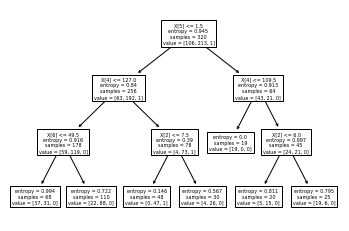

In [22]:
tree.plot_tree(model)

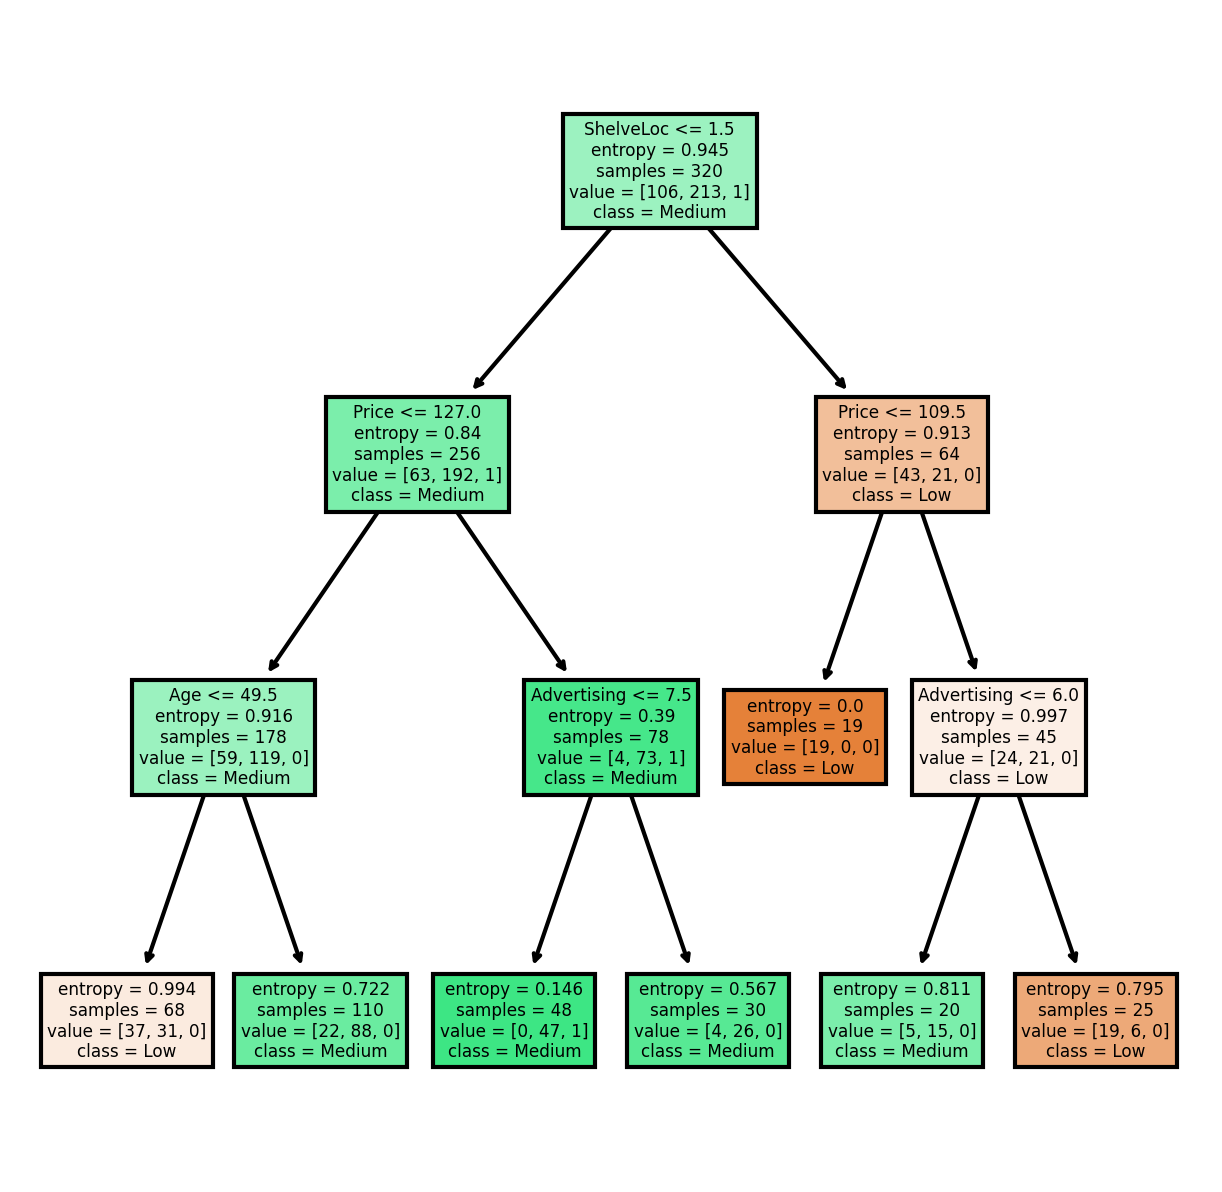

In [23]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_5 <= 1.50
|   |--- feature_4 <= 127.00
|   |   |--- feature_6 <= 49.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  49.50
|   |   |   |--- class: 1
|   |--- feature_4 >  127.00
|   |   |--- feature_2 <= 7.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  7.50
|   |   |   |--- class: 1
|--- feature_5 >  1.50
|   |--- feature_4 <= 109.50
|   |   |--- class: 0
|   |--- feature_4 >  109.50
|   |   |--- feature_2 <= 6.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  6.00
|   |   |   |--- class: 0



In [25]:
model.feature_importances_

array([0.        , 0.        , 0.15910102, 0.        , 0.36932889,
       0.30258547, 0.16898463, 0.        , 0.        , 0.        ])

In [26]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp 

Price          0.369329
ShelveLoc      0.302585
Age            0.168985
Advertising    0.159101
CompPrice      0.000000
Income         0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

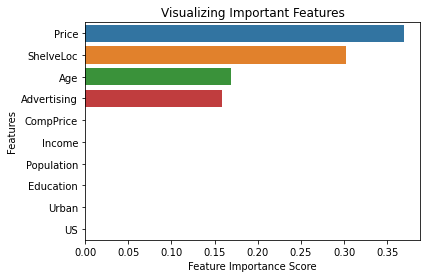

In [27]:
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [28]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    51
0    29
dtype: int64

In [29]:
preds

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [30]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_categorical,,
0,19,14
1,10,37


In [31]:
np.mean(preds==y_test) 

0.7

In [32]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model2.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5625, 0.9, 'X[5] <= 1.5\nentropy = 0.945\nsamples = 320\nvalue = [106, 213, 1]'),
 Text(0.3333333333333333, 0.7, 'X[4] <= 127.0\nentropy = 0.84\nsamples = 256\nvalue = [63, 192, 1]'),
 Text(0.16666666666666666, 0.5, 'X[6] <= 49.5\nentropy = 0.916\nsamples = 178\nvalue = [59, 119, 0]'),
 Text(0.08333333333333333, 0.3, 'X[0] <= 142.0\nentropy = 0.994\nsamples = 68\nvalue = [37, 31, 0]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.999\nsamples = 60\nvalue = [29, 31, 0]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.25, 0.3, 'X[4] <= 92.0\nentropy = 0.722\nsamples = 110\nvalue = [22, 88, 0]'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.937\nsamples = 17\nvalue = [11, 6, 0]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.524\nsamples = 93\nvalue = [11, 82, 0]'),
 Text(0.5, 0.5, 'X[2] <= 7.5\nentropy = 0.39\nsamples = 78\nvalue = [4, 73, 1]'),
 Text(0.4166666666666667, 0.3, 'X[6] <= 78.0\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0

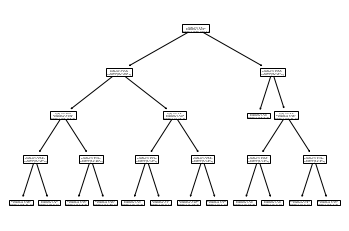

In [33]:
tree.plot_tree(model2)

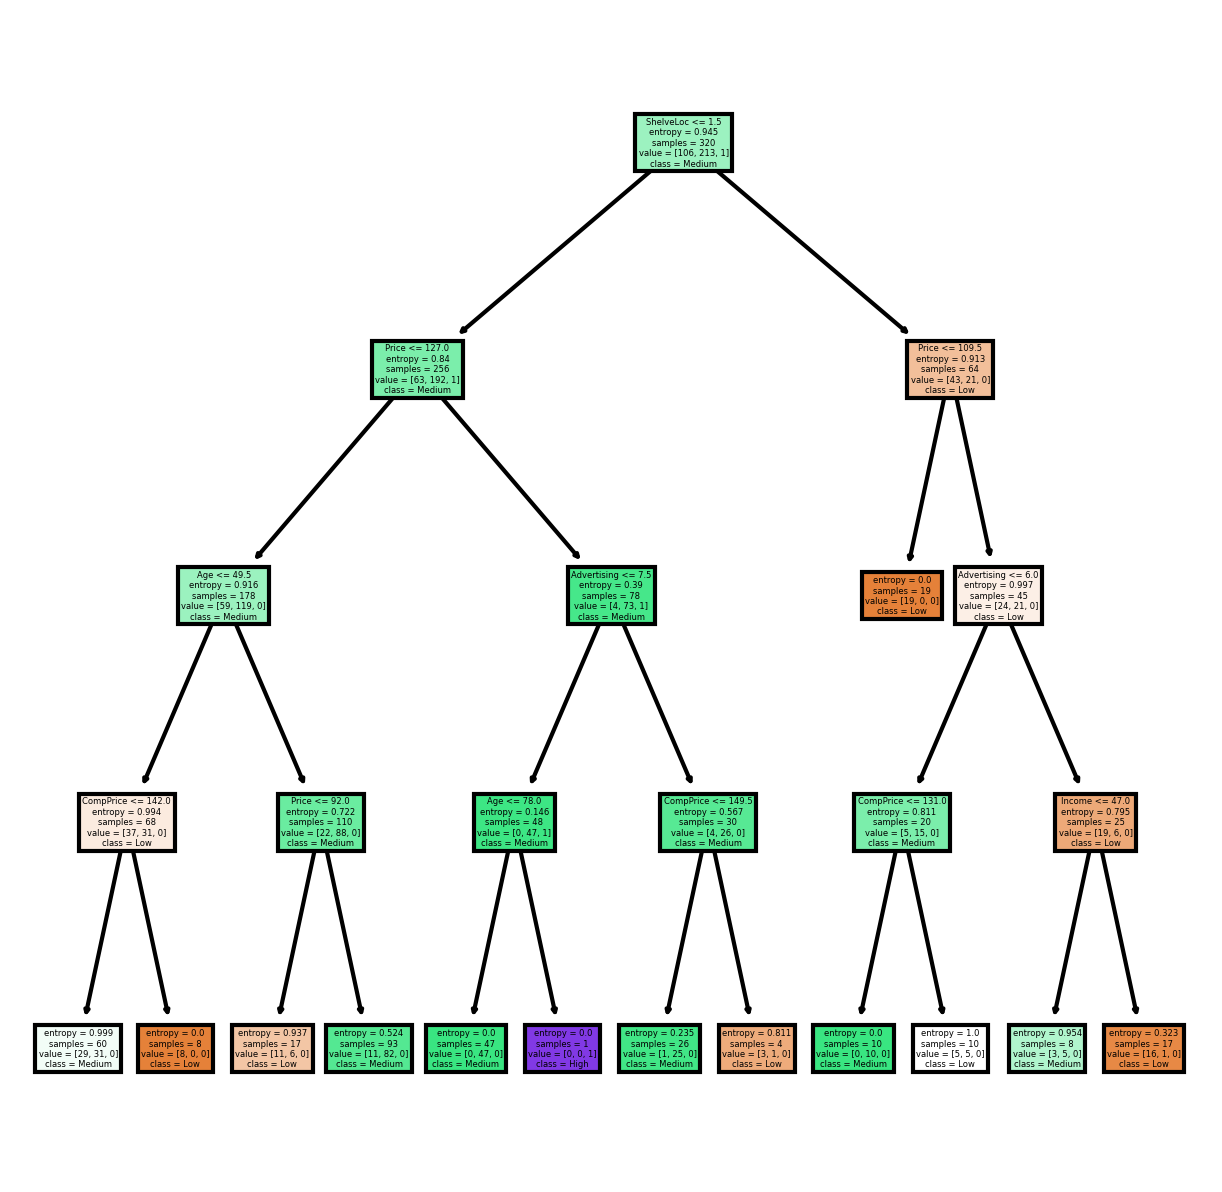

In [34]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [35]:
text = tree.export_text(model2,max_depth=4)  
print(text)

|--- feature_5 <= 1.50
|   |--- feature_4 <= 127.00
|   |   |--- feature_6 <= 49.50
|   |   |   |--- feature_0 <= 142.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  142.00
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  49.50
|   |   |   |--- feature_4 <= 92.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  92.00
|   |   |   |   |--- class: 1
|   |--- feature_4 >  127.00
|   |   |--- feature_2 <= 7.50
|   |   |   |--- feature_6 <= 78.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  78.00
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  7.50
|   |   |   |--- feature_0 <= 149.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  149.50
|   |   |   |   |--- class: 0
|--- feature_5 >  1.50
|   |--- feature_4 <= 109.50
|   |   |--- class: 0
|   |--- feature_4 >  109.50
|   |   |--- feature_2 <= 6.00
|   |   |   |--- feature_0 <= 131.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  131.00
|   |   |   |   |--- cl

In [36]:
model2.feature_importances_

array([0.148215  , 0.04650075, 0.10431462, 0.        , 0.34350152,
       0.19839023, 0.15907787, 0.        , 0.        , 0.        ])

In [37]:
feature_imp = pd.Series(model2.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp 

Price          0.343502
ShelveLoc      0.198390
Age            0.159078
CompPrice      0.148215
Advertising    0.104315
Income         0.046501
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

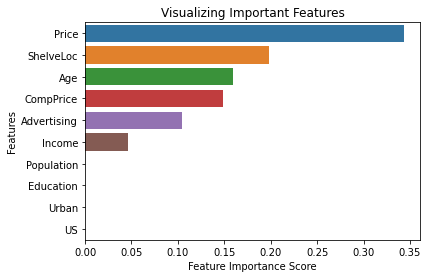

In [38]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [39]:
preds2 = model2.predict(x_test) 
pd.Series(preds2).value_counts() 

1    51
0    28
2     1
dtype: int64

In [40]:
preds2

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [41]:
pd.crosstab(y_test,preds2) 

col_0,0,1,2
Sales_categorical,,,
0,21,12,0
1,7,39,1


In [42]:
np.mean(preds2==y_test)

0.75

 # Building Decision Tree Classifier (CART) using Gini Criteria

In [43]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4) 

In [44]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [45]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.7

In [46]:
model_gini.feature_importances_ 

array([0.20557259, 0.        , 0.15454134, 0.        , 0.29827728,
       0.28842469, 0.05318409, 0.        , 0.        , 0.        ])